# 房屋价格数据集

## 1.基本操作

In [1]:
#import some necessary librairies
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
 
from scipy import stats
from scipy.stats import norm, skew #for some statistics
 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
 
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory
 
train = pd.read_csv('../datasets/Pricetrain.csv')
test = pd.read_csv('../datasets/Pricetest.csv')

In [2]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.000,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 2.查看数据

In [4]:
#查看训练集、测试集大小
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
 
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
 
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
 
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## 3.抛弃一些离群值

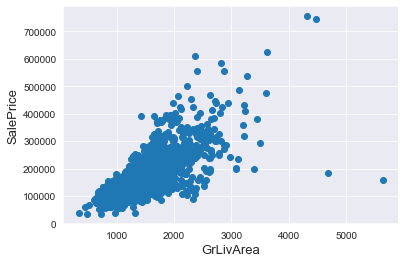

In [5]:
#数据处理
#离群值处理
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [6]:
 
#我们可以看到图像右下角的两个点有着很大的GrLivArea，但相应的SalePrice却异常地低，我们有理由相信它们是离群值，要将其剔除。
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

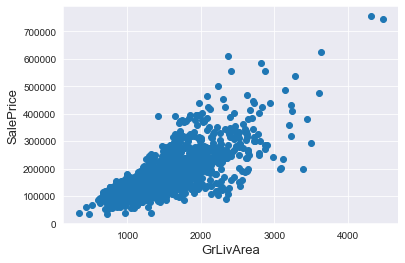

In [7]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 4.线性回归要求因变量SalePrice数据正态分布


 mu = 180932.92 and sigma = 79467.79



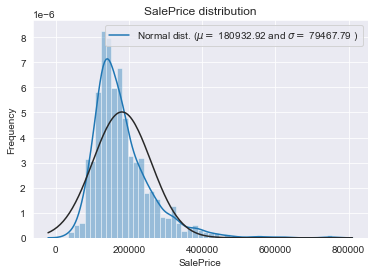

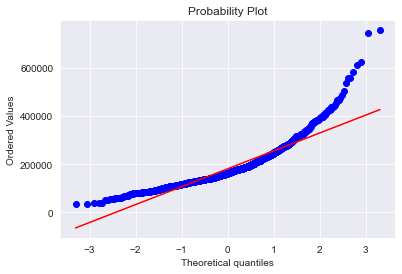

In [8]:
#目标值分析
#我们画出SalePrice的分布图和QQ图（Quantile Quantile Plot）。这里简单说一下QQ图，它是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图。如果QQ图上的点在一条直线附近，则说明数据近似于正态分布，
# 且该直线的斜率为标准差，截距为均值。对于QQ图的详细介绍可以参考这篇文章：https://blog.csdn.net/hzwwpgmwy/article/details/79178485
def analyseAimVal(data):
    sns.distplot(data , fit=norm)#distplot是画直方图#fit=norm拟合标准正态分布
 
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)#获取数据列正太分布的均值和标准差。
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
 
    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')#出现率
    plt.title('SalePrice distribution')
 
    #Get also the QQ-plot
    fig = plt.figure()
    #如果两个分布相似，则该Q-Q图趋近于落在y=x线上。如果两分布线性相关，则点在Q-Q图上趋近于落在一条直线上，但不一定在y=x线上。
    #下面的函数默认dist=norm，也就是说默认你传入的数据train['SalePrice']是与正态分布作比较的。
    #这样的话QQ图鉴别样本数据是否近似于正态分布,只需看QQ图上的点是否近似地在一条直线附近,而且该直线的斜率为标准差,截距为均值.
    res = stats.probplot(data,plot=plt)#函数默认值dist="norm"，即默认与正态分布比较
    plt.show()
analyseAimVal(train['SalePrice'])


 mu = 12.02 and sigma = 0.40



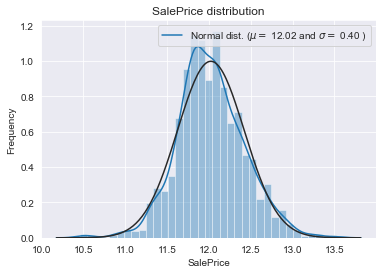

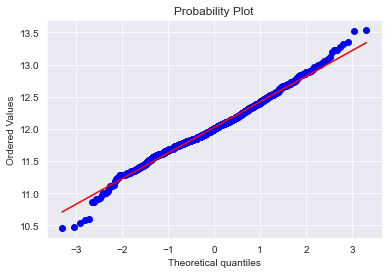

In [9]:
#SalePrice的分布呈正偏态，而线性回归模型要求因变量服从正态分布。我们对其做对数变换，让数据接近正态分布。
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
 
analyseAimVal(train["SalePrice"])

## 5.查看特征相关性

<AxesSubplot:>

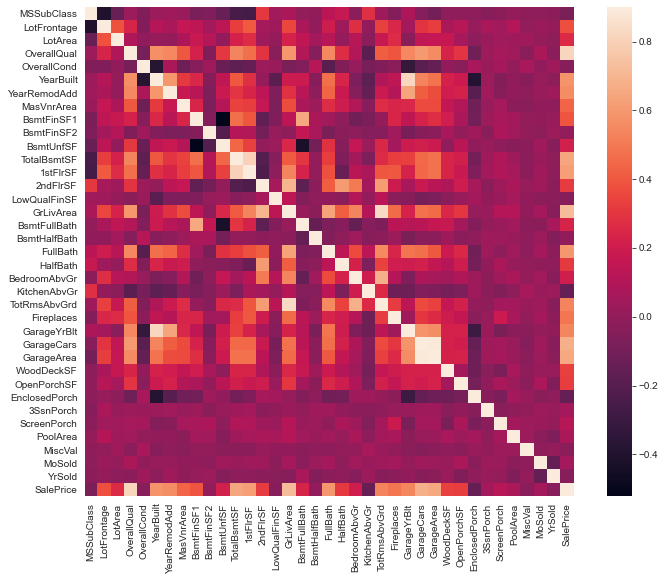

In [10]:
#特征相关性
#用相关性矩阵热图表现特征与目标值之间以及两两特征之间的相关程度，对特征的处理有指导意义。
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## 6.查看各个特征的数值缺失情况

In [11]:
#让我们首先将训练数据和测试数据连接在同一个数据中
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [12]:
#各个特征的数据缺失情况
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageYrBlt,5.451
GarageQual,5.451
GarageCond,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

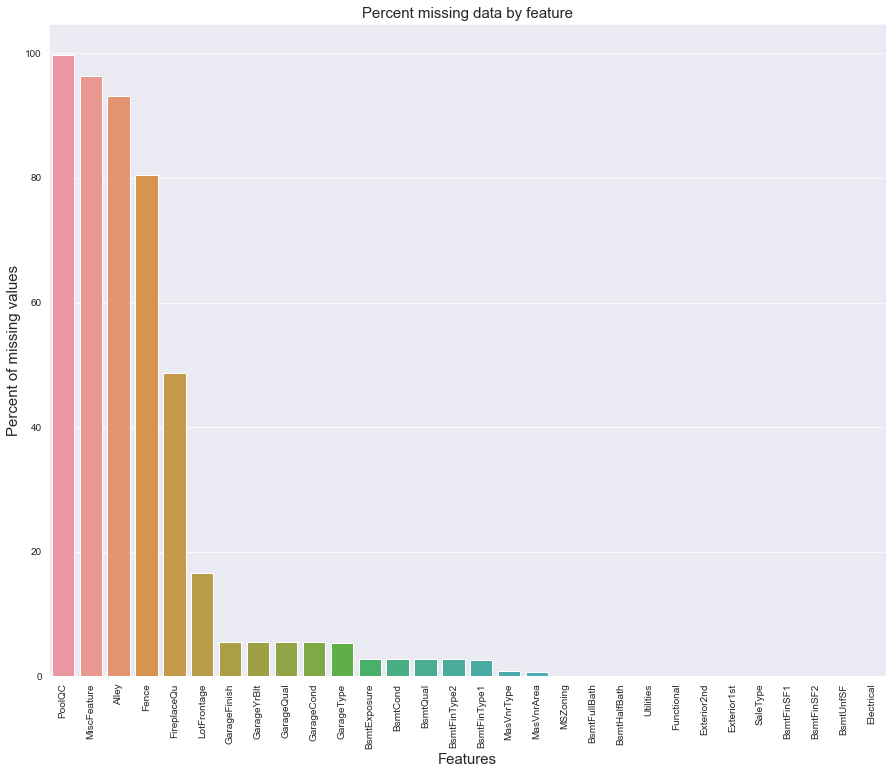

In [13]:
#画图展示缺失情况
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## 7.数据清洗之处理缺失值

In [14]:
#处理缺失值
#在data_description.txt中已有说明，一部分特征值的缺失是因为这些房子根本没有该项特征，对于这种情况我们统一用“None”或者“0”来填充。
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
 
#对于缺失较少的离散型特征，可以用众数填补缺失值。
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
 
#对于LotFrontage项，由于每个Neighborhood的房子的LotFrontage很可能是比较相近的，所以我们可以用各个房子所在Neighborhood的LotFrontage的中位数作为填充值。
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
 
#data_description.txt中还提到过，Functional默认是“Typ”。
all_data["Functional"] = all_data["Functional"].fillna("Typ")
 
#Utilities特征有两个缺失值，且只有一个样本是“NoSeWa”，除此之外全部都是“AllPub”，因此该项特征的方差非常小，我们可以直接将其删去。
all_data = all_data.drop(['Utilities'], axis=1)
#最后确认缺失值是否已全部处理完毕：
print(all_data.isnull().sum().max())

0


## 8.特征工程

In [15]:
#进一步挖掘特征
#我们注意到有些特征虽然是数值型的，但其实表征的只是不同类别，其数值的大小并没有实际意义，因此我们将其转化为类别特征
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
#反过来，有些类别特征实际上有高低好坏之分，这些特征的质量越高，就可能在一定程度导致房价越高。我们将这些特征的类别映射成有大小的数字，以此来表征这种潜在的偏序关系。
all_data['FireplaceQu'] = all_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['GarageQual'] = all_data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['GarageCond'] = all_data['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['GarageFinish'] = all_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
all_data['BsmtQual'] = all_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['BsmtCond'] = all_data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
all_data['ExterQual'] = all_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['ExterCond'] = all_data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['HeatingQC'] = all_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['PoolQC'] = all_data['PoolQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['KitchenQual'] = all_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
all_data['Functional'] = all_data['Functional'].map({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1, 'None': 0})
all_data['Fence'] = all_data['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0})
all_data['LandSlope'] = all_data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1, 'None': 0})
all_data['LotShape'] = all_data['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, 'None': 0})
all_data['PavedDrive'] = all_data['PavedDrive'].map({'Y': 3, 'P': 2, 'N': 1, 'None': 0})
all_data['Street'] = all_data['Street'].map({'Pave': 2, 'Grvl': 1, 'None': 0})
all_data['Alley'] = all_data['Alley'].map({'Pave': 2, 'Grvl': 1, 'None': 0})
all_data['CentralAir'] = all_data['CentralAir'].map({'Y': 1, 'N': 0})

## 9.创造特征，这一块是我有待加强的

In [16]:
#利用一些重要的特征构造更多的特征：
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['OverallQual_TotalSF'] = all_data['OverallQual'] * all_data['TotalSF']
all_data['OverallQual_GrLivArea'] = all_data['OverallQual'] * all_data['GrLivArea']
all_data['OverallQual_TotRmsAbvGrd'] = all_data['OverallQual'] * all_data['TotRmsAbvGrd']
all_data['GarageArea_YearBuilt'] = all_data['GarageArea'] + all_data['YearBuilt']

## 10.Box-cox变换 ：关于这一步也是我从未接触过的，具体怎么用感觉还是有些模糊，以后具体情况看别人代码学习一下吧
Box-cox可以改善数据的正态性、对称性和方差相等性。

In [17]:
#对于数值型特征，我们希望它们尽量服从正态分布，也就是不希望这些特征出现正负偏态。
#那么我们先来计算一下各个特征的偏度：
#取出数值型特征
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
 
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)#降序
skewness = pd.DataFrame({'Skew': skewed_feats})
print(skewness.head(10))
 
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
 
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)#用来降低X的skewness值,达到接近正态分布的目的

                Skew
MiscVal       21.940
PoolQC        19.549
PoolArea      17.689
LotArea       13.109
LowQualFinSF  12.085
3SsnPorch     11.372
KitchenAbvGr   4.301
BsmtFinSF2     4.145
Alley          4.137
EnclosedPorch  4.002
There are 41 skewed numerical features to Box Cox transform


## 11.独热编码，老生常谈了

In [18]:
#独热编码
#对于类别特征，我们将其转化为独热编码，这样既解决了模型不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。
all_data = pd.get_dummies(all_data)
print(all_data.shape)
train = all_data[:ntrain]
test = all_data[ntrain:]

(2917, 254)


In [22]:
print(train.shape)
print(test.shape)

(1458, 254)
(1459, 254)


## 12.建立模型

In [21]:
#建立模型
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
#标准化
#有些时候，数据集中存在离群点，用Z-Score进行标准化，但是结果不理想，因为离群点在标准化后丧失了利群#特性。RobustScaler针对离群点做标准化处理，该方法对数据中心化的数据的缩放健壮性有更强的参数控制能#力。
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)
#评价函数
#先定义一个评价函数。我们采用5折交叉验证。与比赛的评价标准一致，我们用Root-Mean-Squared-Error (RMSE)来为每个模型打分。
#Validation function
n_folds = 5
#定义一个评价函数：
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
#基本模型
lasso = Lasso(alpha=0.0005, random_state=1)
#弹性网络
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
#核岭回归
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#梯度提升回归
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)
#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.8, n_estimators=1000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)
#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#看看他们的表现
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))#std标准差
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1104 (0.0055)

ElasticNet score: 0.1103 (0.0054)

Kernel Ridge score: 0.1196 (0.0085)

Gradient Boosting score: 0.1143 (0.0078)

[22:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/sr

## 13.Stacking   机器学习的大杀器出来了——集成学习

In [ ]:
#集成学习往往能进一步提高模型的准确性，Stacking是其中一种效果颇好的方法，简单来说就是学习各个基本模型的预测值来预测最终的结果。详细步骤可参考：https://www.jianshu.com/p/59313f43916f
#这里我们用ENet、KRR和GBoost作为第一层学习器，用Lasso作为第二层学习器：
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
 
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
 
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                instance.fit(X[train_index], y[train_index])
                self.base_models_[i].append(instance)
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
 
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
 
    # Do the predictions of all base models on the test data and use the averaged predictions as
    # meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)
#Stacking的交叉验证评分：
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

## 14.最终模型

In [ ]:
#建立最终模型
#我们将XGBoost、LightGBM和StackedRegressor以加权平均的方式融合在一起，建立最终的预测模型。
#先定义一个评价函数：
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
#用整个训练集训练模型，预测测试集的房价，并给出模型在训练集上的评分。
#StackedRegressor
stacked_averaged_models.fit(train, y_train)
stacked_train_pred = stacked_averaged_models.predict(train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test))#np.loglp计算加一后的对数，其逆运算是np.expm1；
print(rmsle(y_train, stacked_train_pred))
#XGBoost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))
#LightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))
#融合模型的评分：
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15))
#预测
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
#生成提交文件
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission3.csv', index=False)
#kaggle:0.11652